In [ ]:
!pip install onnx
!pip install onnxscript
!pip install onnxruntime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 593.5/593.5 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 14.9 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/Mhaiyang/CVPR2020_GDNet.git

Cloning into 'CVPR2020_GDNet'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 70 (delta 18), reused 19 (delta 18), pack-reused 30
Receiving objects: 100% (70/70), 19.04 KiB | 3.17 MiB/s, done.
Resolving deltas: 100% (30/30), done.


In [ ]:
cd CVPR2020_GDNet/

/content/CVPR2020_GDNet


In [ ]:
pwd

'/content/CVPR2020_GDNet'

In [ ]:
!pip install xlwt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 3.8 MB/s eta 0:00:00


In [ ]:
!pip install cython
!pip install git+https://github.com/lucasb-eyer/pydensecrf.git

  Cloning https://github.com/lucasb-eyer/pydensecrf.git to /tmp/pip-req-build-8bi_pcmi
  Running command git clone --filter=blob:none --quiet https://github.com/lucasb-eyer/pydensecrf.git /tmp/pip-req-build-8bi_pcmi
  Resolved https://github.com/lucasb-eyer/pydensecrf.git to commit 2723c7fa4f2ead16ae1ce3d8afe977724bb8f87f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pydensecrf: filename=pydensecrf-1.0-cp310-cp310-linux_x86_64.whl size=3405185 sha256=7b10c2b383886b5095f1bac884b8b227af160419d71070509ae9dc8bf1ed01fb
  Stored in directory: /tmp/pip-ephem-wheel-cache-lg69wva7/wheels/01/5b/61/87443ed3bf03dd2940375cf2f8b6fba88efece935465e490b0
Successfully built pydensecrf


Input Name: [1, 1, 416, 416]
[[[[ 0.96455175  0.96455175  0.96455175 ...  0.46793392  0.39943492
     0.45080918]
   [ 0.9816765   0.9816765   0.9816765  ...  0.43368444  0.43368444
     0.24531215]
   [ 0.9988013   0.9816765   0.9816765  ...  0.41655967  0.07406463
    -0.6109256 ]
   ...
   [-1.4329139  -1.4329139  -1.4500387  ... -0.5081771  -0.5253019
    -0.55955136]
   [-1.4671633  -1.4842881  -1.4842881  ... -0.43967807 -0.38830382
    -0.43967807]
   [-1.5356624  -1.5527872  -1.5185376  ... -0.5081771  -0.6451751
    -0.7307989 ]]

  [[ 1.2556022   1.2556022   1.2556022  ...  0.5903362   0.5378152
     0.57282925]
   [ 1.2380953   1.2380953   1.2380953  ...  0.55532223  0.57282925
     0.3802522 ]
   [ 1.2205883   1.2205883   1.2205883  ...  0.5378152   0.2226892
    -0.460084  ]
   ...
   [-0.9502801  -0.9502801  -0.9677871  ...  0.3102242   0.29271722
     0.2577032 ]
   [-0.9852941  -1.0028011  -1.0028011  ...  0.3802522   0.4327732
     0.3802522 ]
   [-1.055322   -1.072829

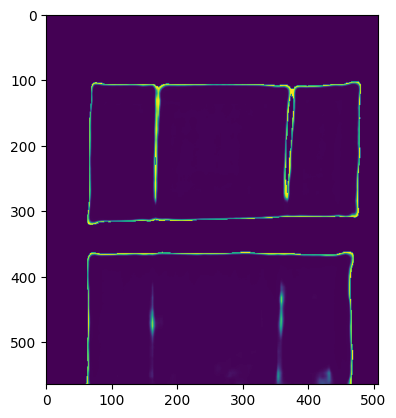

In [ ]:
import cv2
import numpy as np
import time
import onnxruntime
import torchvision.transforms as transforms
from PIL import Image
from misc import check_mkdir, crf_refine
import matplotlib.pyplot as plt
from torch.autograd import Variable

to_pil = transforms.ToPILImage()

def to_numpy(tensor):
    if tensor.requires_grad:
        print("hello")
    return tensor.detach().cpu().numpy() if tensor.requires_grad else tensor.cpu().numpy()

img_transform = transforms.Compose([
    transforms.Resize((416, 416)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Start Session
ort_session = onnxruntime.InferenceSession("/content/drive/MyDrive/GDNet_Quantization/ONNX_Files/model_gdnet.onnx")
# Model Info
input_name = ort_session.get_outputs()[0].shape
print('Input Name:', input_name)

img = Image.open("/content/drive/MyDrive/GDNet_Quantization/GDNet_Images/Image4.jpeg")
resize = transforms.Resize([416, 416])
w, h = img.size
# img_ = resize(img)
# to_tensor = transforms.ToTensor()
img_y = Variable(img_transform(img).unsqueeze(0), requires_grad=False).to("cuda")
print(to_numpy(img_y))
ort_inputs = {ort_session.get_inputs()[0].name: to_numpy(img_y)}
ort_outs = ort_session.run(None, ort_inputs)
img_out_y = ort_outs[2].squeeze(0)
print(img_out_y)
f4 = np.array(transforms.Resize((h, w))(to_pil(img_out_y[0])))
pred_mask = (f4*255).astype(np.uint8)
plt.imshow(pred_mask)
f3 = crf_refine(np.array(img), pred_mask)
# grayImage = cv2.cvtColor(img_out_y[0])
#plt.imshow(Image.fromarray(f3))
#plt.show()
#plt.imshow(Image.fromarray(pred_mask), cmap='gray',)
plt.show()